## Name: Asmita Sinha


## TASK 1

## Prediction Using Supervised ML (Level - Beginner)

## Predict the percentage of a student based on the no. of study hours.

In [1]:
#Load the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The data is successfully imported.

In [3]:
df.shape

(25, 2)

There are 25 rows and 2 columns in the data. 'Hours' is the independent variable and 'Scores' is the dependent variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


Both the columns are numerical in value and there are no null values.

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above table, it is observed that the data is slightly right skewed.

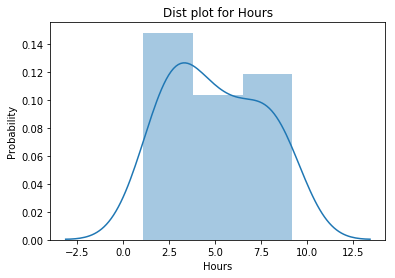

In [7]:
#Dist plot for 'Hours'

sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Dist plot for Hours')
plt.show()

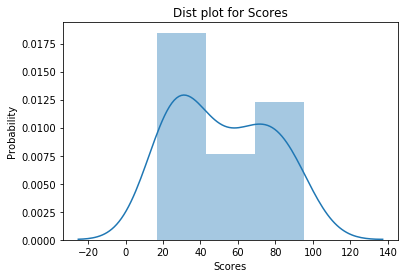

In [8]:
#Dist plot for 'scores'

sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Dist plot for Scores')
plt.show()

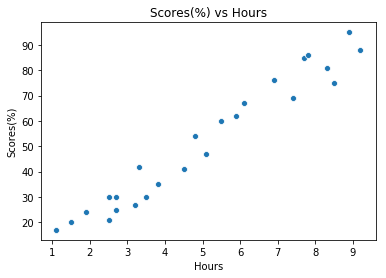

In [9]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.title('Scores(%) vs Hours')
plt.show()

From abovescatter plot, it is observed that scores are highly postively correlated with numver of hours spent in studying. 
As the number of hours increases so shall the marks increase.

In [19]:
#Preparing the data for modelling

x=df[['Hours']]
y=df[['Scores']]

In [24]:
#Splitting the data in train and set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((20, 1), (5, 1))

In [25]:
#Using linear regression for building the model and prediction

from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)

In [26]:
#Fitting the model

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
#Linear Regression intercept

reg.intercept_

array([2.01816004])

In [28]:
#Linear Regression coefficient for hours 

reg.coef_

array([[9.91065648]])

The equation will be:

1. Scores = intercept + coefficient*(Hours)
2. Scores = 2.01816004 + 9.91065648*(Hours)

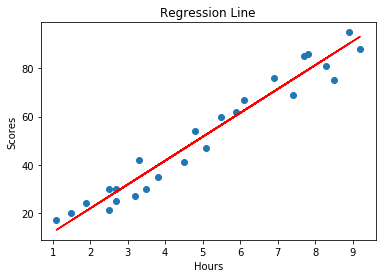

In [29]:
#Plotting the regression line

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

In [30]:
#Predicting the xtest


y_pred=reg.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [31]:
y_pred=y_pred.flatten()

In [33]:
data = pd.DataFrame({'Actual': y_test.values.flatten(),'Prediction':y_pred})

In [34]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [35]:
reg.score(x_test,y_test)

0.9454906892105356

94% variation in the Scores is explained by Hours

In [39]:
#Testing for new data

hours =np.array(9.25).reshape(1,-1)
result =reg.predict(hours)
print('No. of hours: ',np.asscalar(hours))
print('Predicted Score (%): ',np.asscalar(result))

No. of hours:  9.25
Predicted Score (%):  93.69173248737538


In [41]:
#Evaluating the model

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

4.183859899002975

In [42]:
metrics.mean_squared_error(y_test,y_pred)

21.5987693072174

In [43]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.6474476121003665